In [1]:
# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/c/digit-recognizer/data
# Download MNIST data and save it in same folder 


# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Creating dataframe 

df = pd.read_csv("train.csv")

In [3]:
df.head() # First 5 rows

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
l = df['label'] # Storing data of column labled as "label" in l

In [5]:
d = df.iloc[:,1:] # Storing all other data except col 'label' in d
#OR
# d = df.drop("label",axis=1)
d.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


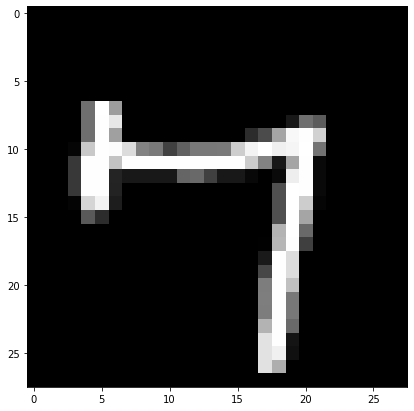

Number is :  7


In [7]:
plt.figure(figsize=(7,7)) # Setting figure size
ind = 120 # row number
grid = d.iloc[ind].to_numpy().reshape(28,28) # Converting into numpy arrary and reshaping it into matrix of size 28 x 28.
plt.imshow(grid, cmap = "gray", interpolation = None)
plt.show()
print("Number is : ", l[ind])

# Visualization using PCA (Manually)

In [8]:
# Using only 1st 10k points
data_sample = d.iloc[:10000]
#print(data_sample.shape)

label = l.iloc[:10000]
#print(label.shape)

In [9]:
# Data Preprocessing (Standardization)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
standardized_data = sc.fit_transform(data_sample)

In [10]:
# Find Covariance (A_transpose * A)
co_var_matrix = np.matmul(standardized_data.T, standardized_data)
co_var_matrix.shape

(784, 784)

In [11]:
# To visualize data in 2D we have to find 1st two eigen values and its corresponding eigen vectors

from scipy.linalg import eigh 
values, vectors = eigh(co_var_matrix, eigvals=(782,783))
print(values.shape)
print(vectors.shape)

(2,)
(784, 2)


In [12]:
# OR
from numpy import linalg as LA
e_val, e_vector = LA.eig(co_var_matrix)
e_val = e_val[:2]
e_vector = e_vector[:2]

print(e_val, e_vector)

[407145.7769519 +0.j 287901.13418243+0.j] [[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]


In [13]:
coordinates = np.matmul(vectors.T, standardized_data.T)
coordinates.shape

(2, 10000)

In [14]:
print (" resultanat new data points' shape ", vectors.T.shape, "X", standardized_data.T.shape," = ", coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 10000)  =  (2, 10000)


In [15]:
import pandas as pd

# appending label to the 2d projected data
coordinates = np.vstack((coordinates, label)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.448069      -4.949725    1.0
1       6.833972      18.966372    0.0
2      -2.051008      -7.527935    1.0
3       5.555069      -0.715448    4.0
4       7.291958      26.253689    0.0


C:\Users\Monster\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


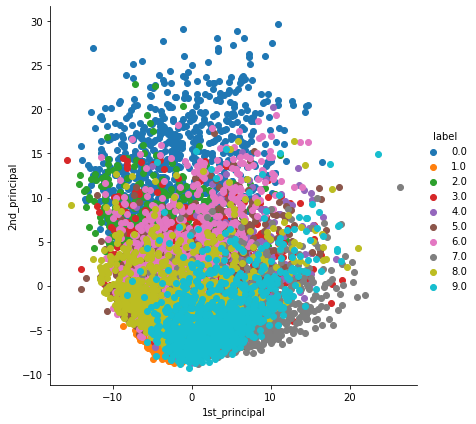

In [16]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA using scikit learn

In [34]:
from sklearn import decomposition
pca = decomposition.PCA()

In [37]:
sample_pca = d.head(15000)
value_pca = l.head(15000)
pca.n_components = 2
pca_data = pca.fit_transform(sample_pca)

print("Reduced PCA shape : ",pca_data.shape)

Reduced PCA shape :  (15000, 2)


In [38]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, value_pca)).T
print(pca_data.shape)

(15000, 3)


C:\Users\Monster\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


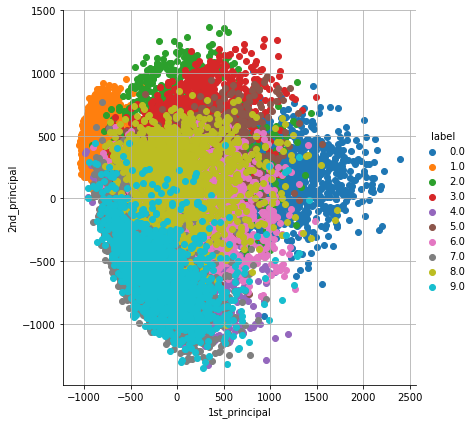

In [41]:
# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.grid()
plt.show()


# PCA for dimensionality redcution (not for visualization)

In [48]:
pca.n_components = 784

sample = standardized_data

pca_data = pca.fit_transform(sample)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)

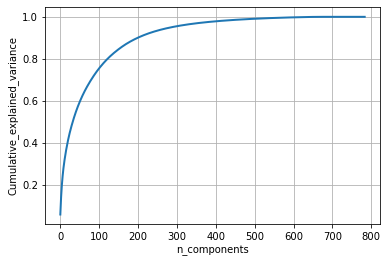

In [49]:
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [ ]:
# If we take 200-dimensions, approx. 90% of variance is expalined.